In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -p kaggle


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirrouhbakhsh","key":"61becb1f3c9e42a841f52392e7817d16"}'}

In [4]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                          title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jacksondivakarr/car-crash-dataset                            Car Crash Dataset                             4MB  2024-01-08 13:44:08           1149         29  1.0              
hummaamqaasim/jobs-in-data                                   Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           4077         78  1.0              
thedrcat/daigt-v2-train-dataset                              DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           3850        304  1.0              
vishakhdapat/price-of-used-toyota-corolla-cars               Price of Used Toyota Corolla Cars            30KB  202

## I used this dataset on kaggle
https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset

In [7]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:38<00:00, 113MB/s] 
100% 3.24G/3.24G [00:38<00:00, 89.9MB/s]


In [8]:
! mkdir /content/drive/MyDrive/largscalefish

In [10]:
! unzip a-large-scale-fish-dataset.zip -d /content/drive/MyDrive/largscalefish

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: /content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: /content/drive/MyD

In [11]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('/content/drive/MyDrive/largscalefish')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content
Current working directory: /content/drive/MyDrive/largscalefish


##show number of content in folder

In [13]:
os.chdir('/content/drive/MyDrive/largscalefish/Fish_Dataset')
!find . -type f -printf . | wc -c

18003


In [15]:
import os
import shutil
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.metrics import Recall,Precision
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras import models, layers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [16]:
root_path = Path("/content/drive/MyDrive/largscalefish/Fish_Dataset")
#This line uses the glob() method on the root_path object to find all files ending with .png
#within that directory and its subdirectories.
sub_paths = root_path.glob(r'**/*.png')
#converting to list, will deal with generator later
sub_paths = list(sub_paths)
#creating temporary list to handle generator
data = []
for i in range(len(sub_paths)):
    #get the 2nd from last directory name
    label = os.path.split(os.path.split(sub_paths[i])[0])[1]
    data.append([str(sub_paths[i]), label])

#Appending data to dataframe
df = pd.DataFrame(data, columns=['path', 'label'])
#Removing ground truths or GT at the end of the labels
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)

In [22]:
len(sub_paths)

18000


1. os.path.split():

The os.path.split() function takes a path as input and splits it into a pair, (head, tail).
The head is the directory part of the path, and the tail is the file name part of the path.
2. os.path.split(sub_paths[i])[0]:

This part of the line splits the path sub_paths[i] using os.path.split().
The result is a pair, (head, tail), where head is the directory part of the path and tail is the file name part of the path.
We are only interested in the head, so we access the first element of the pair using [0].
3. label = os.path.split(os.path.split(sub_paths[i])[0])[1]:

This part of the line splits the head part of the path (from the previous step) using os.path.split() again.
The result is another pair, (head, tail), where head is the second-to-last directory part of the path and tail is the last directory part of the path.
We are only interested in the head, which is the label, so we access the first element of the pair using [1].

In [23]:
sub_paths[0]

PosixPath('/content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT/00001.png')

In [26]:
os.path.split(sub_paths[0])[1]

'00001.png'

In [27]:
os.path.split(sub_paths[0])[0]

'/content/drive/MyDrive/largscalefish/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT'

In [21]:
label = os.path.split(os.path.split(sub_paths[0])[0])[1]
label


'Black Sea Sprat GT'

In [30]:
df

,path,label
0,/content/drive/MyDrive/largscalefish/Fish_Data...,Black Sea Sprat
1,/content/drive/MyDrive/largscalefish/Fish_Data...,Black Sea Sprat
2,/content/drive/MyDrive/largscalefish/Fish_Data...,Black Sea Sprat
3,/content/drive/MyDrive/largscalefish/Fish_Data...,Black Sea Sprat
4,/content/drive/MyDrive/largscalefish/Fish_Data...,Black Sea Sprat
...,...,...
8995,/content/drive/MyDrive/largscalefish/Fish_Data...,Trout
8996,/content/drive/MyDrive/largscalefish/Fish_Data...,Trout
8997,/content/drive/MyDrive/largscalefish/Fish_Data...,Trout
8998,/content/drive/MyDrive/largscalefish/Fish_Data...,Trout


In [31]:
#Splitting into training, validation, and testing data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2, shuffle=True)
train_df.count()
test_df.count()

path     7200
label    7200
dtype: int64

path     1800
label    1800
dtype: int64

##ImageDataGenerator

In [33]:
#Importing images using image data preprocessing provided from keras
train_generator = ImageDataGenerator(validation_split=0.2)
test_generator = ImageDataGenerator()

train_imgs = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    subset = "training"
)
val_imgs = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    subset = "validation"
)
test_imgs = test_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col = "path",
    y_col = "label",
    target_size = (224, 224),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = False
    )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


##Model Initialization

In [35]:
# Model Initialization

base_model = VGG19(input_shape=(224,224,3),
                         include_top=False,
                         weights="imagenet")

80134624/80134624 [==============================] - 1s 0us/step


##Freezing Layers

In [36]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

##Building Model

In [37]:
# Building Model
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(9,activation='softmax'))

In [38]:
# Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                       

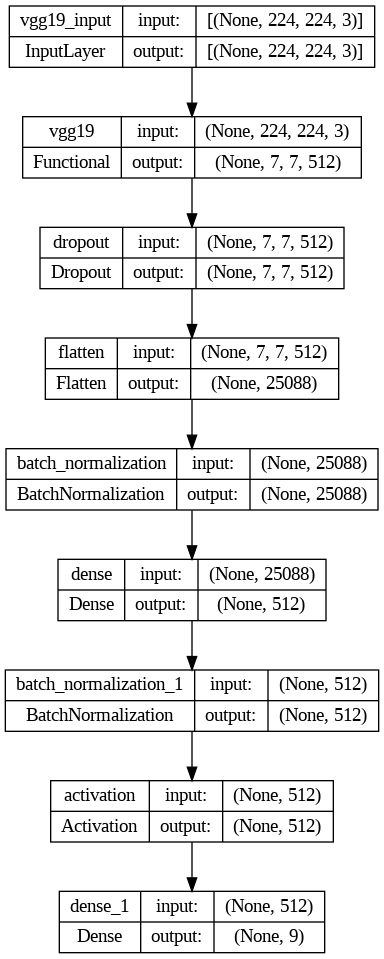

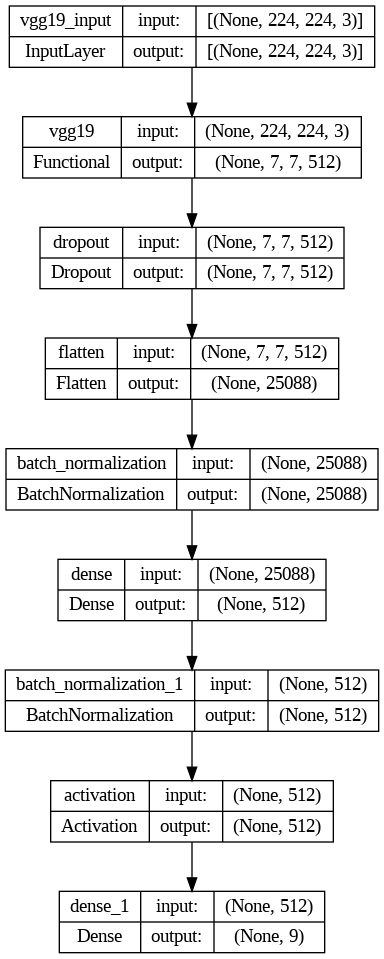

In [40]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)


##Model Compile

In [41]:
# Model Compile

OPT    = tensorflow.keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy',Precision(),Recall()],
              optimizer=OPT)

##Defining Callbacks¶

In [42]:
# Defining Callbacks

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 5,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

In [43]:
model_history=model.fit(train_imgs,
                        validation_data=val_imgs,
                        epochs = 10,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 0.2332 - accuracy: 0.9243 - precision: 0.9446 - recall: 0.9095
Epoch 1: val_accuracy improved from -inf to 0.99444, saving model to ./best_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


180/180 [==============================] - 121s 599ms/step - loss: 0.2332 - accuracy: 0.9243 - precision: 0.9446 - recall: 0.9095 - val_loss: 0.0142 - val_accuracy: 0.9944 - val_precision: 0.9958 - val_recall: 0.9931
Epoch 2/10
180/180 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9948 - precision: 0.9953 - recall: 0.9939
Epoch 2: val_accuracy improved from 0.99444 to 0.99861, saving model to ./best_weights.hdf5
180/180 [==============================] - 97s 539ms/step - loss: 0.0229 - accuracy: 0.9948 - precision: 0.9953 - recall: 0.9939 - val_loss: 0.0105 - val_accuracy: 0.9986 - val_precision: 0.9986 - val_recall: 0.9979
Epoch 3/10
180/180 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9972 - precision: 0.9974 - recall: 0.9967
Epoch 3: val_accuracy did not improve from 0.99861
180/180 [==============================] - 90s 502ms/step - loss: 0.0134 - accuracy: 0.9972 - precision: 0.9974 - recall: 0.9967 - val_loss: 0.0104 - val_accu

In [44]:
import keras
model.save('./best_weights.hdf5')
#model = keras.models.load_model('./best_weights.hdf5')

##Plot

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

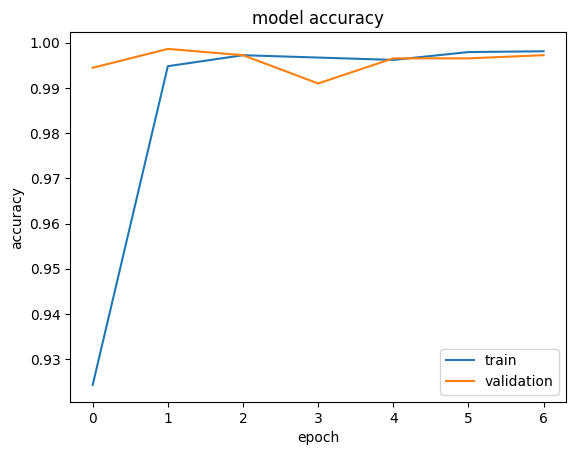

Text(0.5, 1.0, 'train set loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

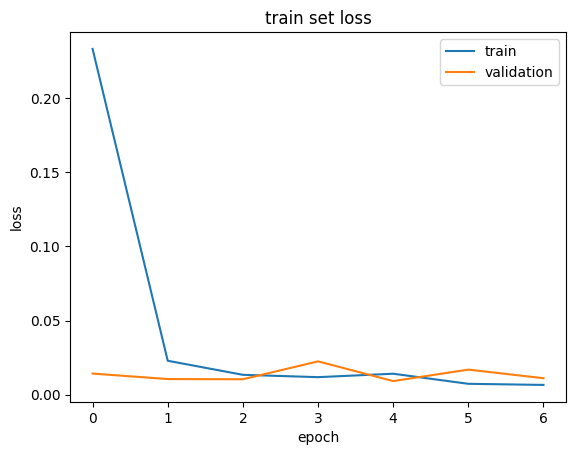

Text(0.5, 1.0, ' precision')

Text(0, 0.5, 'precision')

Text(0.5, 0, 'epoch')

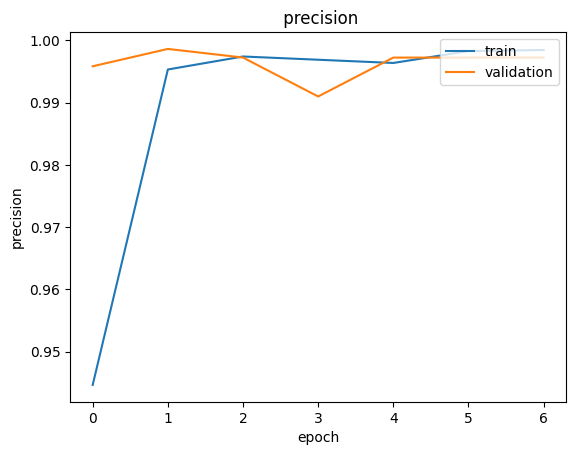

Text(0.5, 1.0, ' recall')

Text(0, 0.5, 'recall')

Text(0.5, 0, 'epoch')

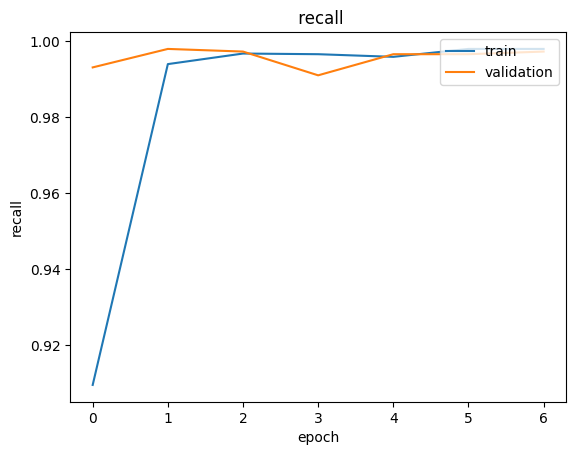

In [45]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('train set loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(model_history.history['precision'])
plt.plot(model_history.history['val_precision'])
plt.title(' precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plt.plot(model_history.history['recall'])
plt.plot(model_history.history['val_recall'])
plt.title(' recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##Test

In [46]:
loss, accuracy , precision,recall=model.evaluate(test_imgs)
print('Test Accuracy: %.3f' % accuracy)
print('Test Precision: %.3f' % precision)
print('Test Recall: %.3f' % recall)
print('Test loss: %.3f' % loss)

57/57 [==============================] - 29s 503ms/step - loss: 0.0303 - accuracy: 0.9933 - precision: 0.9933 - recall: 0.9928
Test Accuracy: 0.993
Test Precision: 0.993
Test Recall: 0.993
Test loss: 0.030


In [47]:
y_pred = model.predict(test_imgs)
y_pred = np.argmax(y_pred,axis=1)

57/57 [==============================] - 25s 433ms/step


In [48]:
from sklearn.metrics import classification_report
print(classification_report(test_imgs.labels,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       0.99      1.00      0.99       210
           2       1.00      1.00      1.00       216
           3       1.00      0.99      1.00       202
           4       1.00      0.98      0.99       192
           5       0.98      1.00      0.99       184
           6       0.99      1.00      0.99       192
           7       0.99      0.98      0.99       189
           8       1.00      0.99      1.00       205

    accuracy                           0.99      1800
   macro avg       0.99      0.99      0.99      1800
weighted avg       0.99      0.99      0.99      1800

